#Python機械学習プログラミング　第二章　第二節

　今回はPythonのコードを載せていますが、理解する必要はありません。難易度が高すぎるので。僕はよくいうのですが、わからないものをわからないもので説明されてわかるわけがないのです。それは恥ずかしいことなのではなく当たり前です。なので今は直感的にわかる図だけ見てもらえてば良いです！!

In [ ]:
import numpy as np


class Perceptron(object):
    """パーセプトロンの分類器

    パラメーター
    ------------
    eta : float
      学習率(0.0から1.0の値を取る)
    n_iter : int
      訓練データの訓練回数
    random_state : int
      重みを初期化するための乱数シード

  　属性
    -----------
    w_ : 1次元配列
      適合後の重み
    errors_ : リスト
      各エポックでの誤分類(更新)の値

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """訓練データに適合させる

        パラメーター
        ----------
        X : {配列のようなデータ}, shape = [n_examples, n_features]
          訓練データ
          n_exsampleは訓練データの個数,n_featureは特徴量の個数
        y : 配列のようなデータ, shape = [n_examples]
          目的変数

        戻り値
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter): # 訓練回数分まで訓練データを反復
            errors = 0
            for xi, target in zip(X, y): # 各訓練データで重みを更新
                #重み w_1,....,w_nの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                #重み w_0の更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """総入力(z)を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [44]:
import os
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" ,header=None,encoding="utf-8")

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 実際にコードを利用しょう
　実際に上記のコードを利用してみようと思います。利用するためにはデータが必要になるので今回はIrisデータを利用します。Irisとは花のアヤメのことで非常によく使われるデータになります。0列目には「ガク片の長さ」1列目には「ガク片の幅」2列目には「花弁の長さ」3列目には「花弁の幅」4列目には「花の種類(4種類)」が入っています。<br>
<br>
　その中から今回は0列目と2列目を選択。また、「花の種類」は4種類の中から2種類を選択します。この操作をしたものが下のコードでそれを散布図で可視化したものを表示しています。

In [ ]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=e513cc986d53abe0dfd4c47748ebc9e55015d039178db37ac25600ecf7503c0a
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


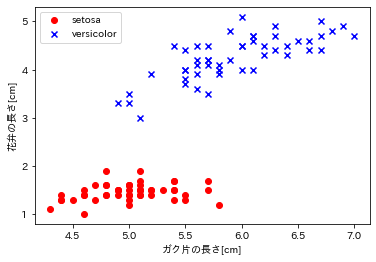

In [ ]:
import japanize_matplotlib 
import matplotlib.pyplot as plt
import numpy as np

# 1~100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1,Iris-versicolorを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)

# 1~100行目の1,3列目の抽出
X = df.iloc[0:100, [0, 2]].values

# 品種setosaのプロット(赤の○)
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
#品種versicolorのプロット(青の×)
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
#軸のラベル設定
plt.xlabel('ガク片の長さ[cm]')
plt.ylabel('花弁の長さ[cm]')
# 凡例の設定(左上に設置)
plt.legend(loc='upper left')
#図の表示
plt.show()

この図を参照するとsetosaとversicolorを直線で完全に分けることが可能であることがわかります。つまり、今の状況はパワポの7枚目に線が引いていないのと全く同じです。ではその線を決めていきましょう。線をどのように決めるのかといえば赤と青を完全に分類できれば良いわけです。なので、繰り返し回数(エポック数と言います)を横軸にとって縦軸に誤分類の個数をとったグラフを作成します。

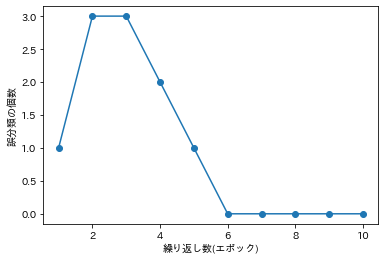

In [ ]:
#パーセプトロン(最初のコード部分)のオブジェクトの作成
ppn = Perceptron(eta=0.1, n_iter=10)
#訓練データにモデルの適合
ppn.fit(X, y)
#繰り返し数(エポック)と誤分類の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
#軸のラベル設定
plt.xlabel("繰り返し数(エポック)")
plt.ylabel('誤分類の個数')
#図の表示
plt.show()

　これを見ると繰り返し数が6回になった時点で誤分類数が0になります。つまり完全に分類できているというわけです。やったー、となりますがいやどんな直線で分けてるんですか、って話だと思うので先程の散布図のところに今回決定した直線をプロットしてみます！

In [57]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # マーカーとカラーマップの準備(後で図示するときの色を設定している)
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット(グリッドポイントの生成のため)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成(格子点の作成)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #各特長量を1次元配列に変換して予測を実行(元々の関数の定義上1次元に変換する必要がある)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換(グリッドポイントの等高線をプロットする上で必要な作業)
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット(直線とその上と下の範囲に色付けをする)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

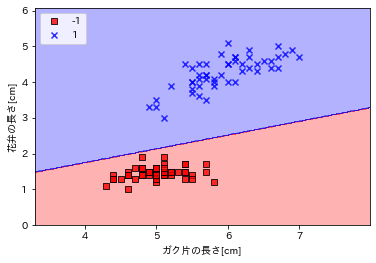

In [ ]:
#決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
#軸のラベル設定
plt.xlabel('ガク片の長さ[cm]')
plt.ylabel('花弁の長さ[cm]')
# 凡例の設定(左上に設置)
plt.legend(loc='upper left')
#図の表示
plt.show()

　実際に決定領域(直線)をプロットすると上の図のようになります。これを見るとしっかりと全てのデータが分けられていますね。こうするとなかなか綺麗に見えて楽しいのではないでしょうか笑<br>
　まあそんなことは置いておいてしっかりと分けられていることもその時に作られた決定領域もわかるようになりました。

#Python機械学習プログラミング　第二章　第五節　その1

　今回はPythonのコードを載せていますが、理解する必要はありません。難易度が高すぎるので。僕はよくいうのですが、わからないものをわからないもので説明されてわかるわけがないのです。それは恥ずかしいことなのではなく当たり前です。なので今は直感的にわかる図だけ見てもらえてば良いです！!

In [42]:
class AdalineGD(object):
    """ADAptive LInear NEuron分類器

    パラメーター
    ------------
    eta : float
      学習率(0.0から1.0の値を取る)
    n_iter : int
      訓練データの訓練回数
    random_state : int
      重みを初期化するための乱数シード

  　属性
    -----------
    w_ : 1次元配列
      適合後の重み
    cost_ : リスト
      各エポックでの誤差平方和のコスト関数
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
          self.eta = eta
          self.n_iter = n_iter
          self.random_state = random_state

    def fit(self, X, y):
        """ 訓練データに適合させる

        パラメーター
        ----------
        X : {配列のようなデータ}, shape = [n_examples, n_features]
          訓練データ
          n_exsampleは訓練データの個数,n_featureは特徴量の個数
        y : 配列のようなデータ, shape = [n_examples]
          目的変数

        戻り値
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # activationメソッドは単なる恒等関数であるためこのコードではなんの意味もないことに注意
            # あくまで今後出現する同じようなコードのために汎化性を持たせているだけ
            output = self.activation(net_input)
            #誤差の計算
            errors = (y - output)
            #w_1,...,w_nの更新(パーセプトロンと異なり全データを利用して一気に変更)
            #パーセプトロンはそれぞれのx_jに応じて変更
            self.w_[1:] += self.eta * X.T.dot(errors)
            #w_0の更新
            self.w_[0] += self.eta * errors.sum()
            #コスト関数の計算
            cost = (errors**2).sum() / 2.0
            #コストの格納
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return X

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## 実際にコードを利用しょう
　実際に上記のコードを利用してみようと思います。利用するためにはデータが必要になるので今回はIrisデータを利用します。Irisとは花のアヤメのことで非常によく使われるデータになります。0列目には「ガク片の長さ」1列目には「ガク片の幅」2列目には「花弁の長さ」3列目には「花弁の幅」4列目には「花の種類(4種類)」が入っています。<br>
<br>
　その中から今回は0列目と2列目を選択。また、「花の種類」は4種類の中から2種類を選択します。この操作をしたものが下のコードでそれを散布図で可視化したものを表示しています。

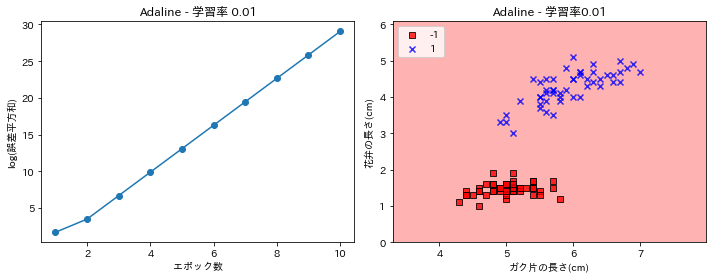

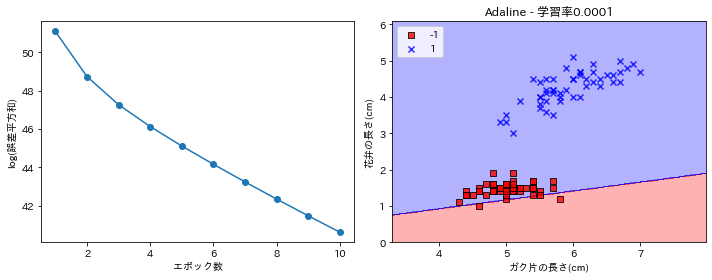

In [71]:
#描画領域を1行2列に設定
fig_1, ax_1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#勾配降下法によるADALINEの学習(学習率eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
#エポック数とコストの関係を表す折れ線グラフのプロット(縦軸は常用対数)
ax_1[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
#軸ラベルの設定
ax_1[0].set_xlabel('エポック数')
ax_1[0].set_ylabel('log(誤差平方和)')
#タイトルの設定
ax_1[0].set_title('Adaline - 学習率 0.01')
#決定境界のプロット
plot_decision_regions(X, y, classifier=ada1)
#タイトルの設定
plt.title('Adaline - 学習率0.01')
#軸ラベルの設定
plt.xlabel('ガク片の長さ(cm)')
plt.ylabel('花弁の長さ(cm)')
#凡例の設定(左上に設置)
plt.legend(loc='upper left')
plt.tight_layout()
#描画領域を1行2列に設定
fig_2, ax_2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#勾配降下法によるADALINEの学習(学習率eta=0.0001)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
#エポック数とコストの関係を表す折れ線グラフのプロット(縦軸は常用対数)
ax_2[0].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
#軸ラベルの設定
ax_2[0].set_xlabel('エポック数')
ax_2[0].set_ylabel('log(誤差平方和)')
#決定境界のプロット
plot_decision_regions(X, y, classifier=ada2)
#タイトルの設定
plt.title('Adaline - 学習率0.0001')
#軸ラベルの設定
plt.xlabel('ガク片の長さ(cm)')
plt.ylabel('花弁の長さ(cm)')
#凡例の設定(左上に設置)
plt.legend(loc='upper left')
#図の表示
plt.tight_layout()
plt.show()

　これで何がわかるのって話です。縦軸に取られている残差平方和に関してですが今までの議論は全てこの残差平方和を小さくしましょうという話でした。<br>
<br>
　ここで上の左側のグラフを見てもらうと下は小さくなっているのに上は多くなってしまっていますね。何が起きているのでしょうか。スライドを見れる方はスライドの14枚目を見て欲しいのですがこの矢印部分の大きさは学習率(eta)によって決まります。つまり今回は矢印の大きさが大きすぎてスライド17枚目のようになってしまっているわけです。これでは収束するわけがありませんよね。<br>
<br>
　さて次は縦軸の値に着目してください。上は確かに増加してしまっているのですが最大最大値は30程度です。しかし下は減っているものの最小値が40程度と大きくなってしまいます。先ほども書きましたが学習率は矢印部分の大きさになるのです。つまり、今回は矢印の大きさが小さすぎてスライドの18枚目のようになってしまっているわけです。こうするといくら残差平方和が小さくなっても収束するまでの計算コストが半端ないことになりますね。<br>
<br>
　一応その時の決定境界も図示してあります。まあ、使い物になる代物になっていないことだけ理解いただければ！！<br>
<br>
　学習率は自分の手で決める必要があります。しかもデータによって最適な学習率は全然違います。つまり学習率の最適な決定方法は存在しませんがベターなのは[0.1,0.01,0.001,0.0001,0.00001]を実行して一番残差平方和が小さくなるあたりから絞り込むというやり方なように思います。正直、これも正解とはいえないのでぜひ自分で手を動かして色々試してみてください！！

#Python機械学習プログラミング　第二章　第五節　その2
　さて、ここまでで学習率が小さすぎると計算コストが高すぎる問題、大きすぎると収束しない問題があることは理解できたでしょうか。実はこの問題を解決するのは学習率の調整だけではなく標準化という手段を使うことで改善することができますのでそれを実際に見ていきましょう。

In [49]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

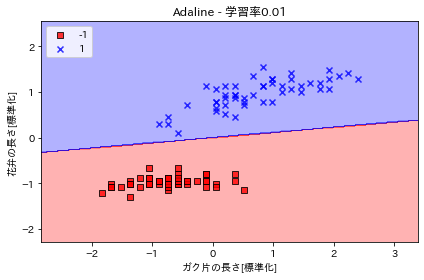

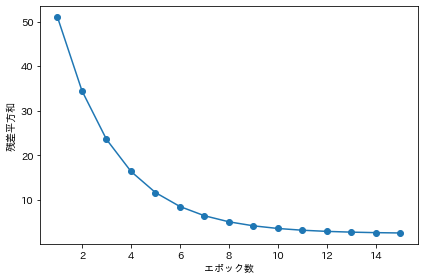

In [72]:
#勾配降下法によるADALINEの学習(学習率eta=0.01)
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
#決定境界のプロット
plot_decision_regions(X_std, y, classifier=ada_gd)
#タイトルの設定
plt.title('Adaline - 学習率0.01')
#軸ラベルの設定
plt.xlabel('ガク片の長さ[標準化]')
plt.ylabel('花弁の長さ[標準化]')
#凡例の設定(左上に設置)
plt.legend(loc='upper left')
#図の表示
plt.tight_layout()
plt.show()
#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('エポック数')
plt.ylabel('残差平方和')
#図の表示
plt.tight_layout()
plt.show()

　一つ前の図と比較してみてください。<br>
<br>
　一目瞭然で後者の方がきれいに分かれています。それはエポック数と残差平方和のグラフを見ても一目瞭然です。これが標準化の強みになります。<br>
<br>
　これを見れば標準化を使ってみようかなという気になりますかね笑面倒くさがって標準化などをしない人も散見されるのですがこれを見れば明らかなように標準化が効果的に働いていますね。もちろん、標準化の意味がない場合も存在しますが基本的には標準化をすることを頭の片隅に置いておいてください！！

##Python 機械学習プログラミング　第二章　第六節
　今回はPythonのコードを載せていますが、理解する必要はありません。難易度が高すぎるので。僕はよくいうのですが、わからないものをわからないもので説明されてわかるわけがないのです。それは恥ずかしいことなのではなく当たり前です。なので今は直感的にわかる図だけ見てもらえてば良いです！!

In [90]:
class AdalineSGD(object):
    """ADAptive LInear NEuron分類器

      パラメーター
      ------------
      eta : float
        学習率(0.0から1.0の値を取る)
      n_iter : int
        訓練データの訓練回数
      suffle : boolean(デフォルトTrue)
        Trueの場合は循環を回避するためにエポックごとに訓練データをシャッフル
      random_state : int
        重みを初期化するための乱数シード

    　属性
      -----------
      w_ : 1次元配列
        適合後の重み
      cost_ : リスト
        各エポックで全ての訓練データの平均を求める誤差平方和のコスト関数
      """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        #学習率の初期化
        self.eta = eta
        #訓練回数の初期化
        self.n_iter = n_iter
        #重みの初期化フラグはFalseに設定
        self.w_initialized = False
        #各エポックで訓練データをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        #乱数シードを設定
        self.random_state = random_state
        
    def fit(self, X, y):
        """ 訓練データに適合させる

        パラメーター
        ----------
        X : {配列のようなデータ}, shape = [n_examples, n_features]
          訓練データ
          n_exsampleは訓練データの個数,n_featureは特徴量の個数
        y : 配列のようなデータ, shape = [n_examples]
          目的変数

        戻り値
        -------
        self : object

        """
        #重みベクトルの作成
        self._initialize_weights(X.shape[1])
        #コストを格納するリストの生成
        self.cost_ = []
        #訓練回数分まで訓練データを反復
        for i in range(self.n_iter):
            #指定された場合は訓練データをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            #各訓練データのコストを格納するリストの生成
            cost = []
            #各訓練データに対する計算
            for xi, target in zip(X, y):
                #特長量x_iと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            #訓練データの平均コストとの計算
            avg_cost = sum(cost) / len(y)
            #平均コストを格納
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """重みを初期化させることなく訓練データに適合させる"""
        #初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        #目的変数yの要素数が2以上の場合は各訓練データの特長量x_iと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        #目的変数yの要素数が1の場合は訓練データ全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """訓練データをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        #活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        #誤差の計算
        error = (target - output)
        #重みw_1,...w_mの更新
        self.w_[1:] += self.eta * xi.dot(error)
        #重みw_0の更新
        self.w_[0] += self.eta * error
        #コストの計算
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return X

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

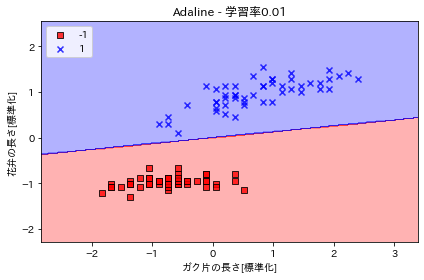

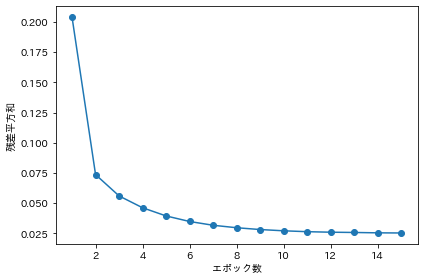

In [92]:
#確率的勾配降下法によるADALINEの学習
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
#モデルへの適合
ada_sgd.fit(X_std, y)

#決定境界のプロット
plot_decision_regions(X_std, y, classifier=ada_sgd)
#タイトルの設定
plt.title('Adaline - 学習率0.01')
#軸ラベルの設定
plt.xlabel('ガク片の長さ[標準化]')
plt.ylabel('花弁の長さ[標準化]')
#凡例の設定(左上に設置)
plt.legend(loc='upper left')
#図の表示
plt.tight_layout()
plt.show()
#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('エポック数')
plt.ylabel('残差平方和')
#図の表示
plt.tight_layout()
plt.show()

　折れ線グラフを見てもらえればわかると思いますが残差平方和の減り方が前に比べて急激になっていますね。つまり早く収束に向かっているということです。今回はビッグデータではないので大きな差は見られませんがビッグデータになればこの小さなさは大きな差になります。ビッグデータなんて実社会に出ないと使わないと思われる方もいるかもしれませんがデータ分析コンペに参加しようと思うと300万行*30列みたいなデータは結構ザラなので今のうちから計算コストを低くすることは念頭に置いておきましょう！！